In [48]:
import pandas as pd

df = pd.read_csv("/content/DS_Cricket.csv")

In [49]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [67]:
new_df = df[['Ave', 'SR']]
new_df.head()

,Ave,SR
0,44.83,86.23
1,41.98,78.86
2,42.03,80.39
3,32.36,91.20
4,33.37,78.96


In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler = StandardScaler()
new_df_sc = scaler.fit_transform(new_df)
new_df_sc = pd.DataFrame(new_df_sc, columns = new_df.columns)

In [70]:
new_df_sc.head()

,Ave,SR
0,1.072294,0.703152
1,0.587725,-0.044139
2,0.596226,0.110997
3,-1.047909,1.207091
4,-0.876185,-0.034000


In [71]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 4, random_state=100)
model.fit(new_df_sc)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=100)

In [72]:
model.labels_

array([3, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 3, 2, 3, 2, 0, 1, 1, 0, 1,
       2, 1, 0, 3, 2, 0, 2, 1, 2, 2, 1, 2, 3, 2, 2, 1, 3, 1, 2, 2, 3, 2,
       2, 2, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0, 2, 0, 1, 3, 3, 1,
       1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2], dtype=int32)

In [73]:
df['Label'] = model.labels_

In [74]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Label
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,3
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,1
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,0
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,2


In [76]:
# (high SR, high Ave) - A, (low SR, low Ave) - B, (High SR, Low Ave) - C, (Low SR, High Ave) - D

df[df.Label == 0]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Label
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,0
10,TM Dilshan (SL),1999-2016,330,303,41,10290,161*,39.27,11933,86.23,22,47,11,0
12,AC Gilchrist (AUS/ICC),1996-2008,287,279,11,9619,172,35.89,9922,96.94,16,55,19,0
17,CH Gayle (ICC/WI),1999-2015,269,264,17,9221,215,37.33,10834,85.11,22,47,23,0
20,Yuvraj Singh (Asia/INDIA),2000-2017,304,278,40,8701,150,36.55,9924,87.67,14,52,18,0
24,V Sehwag (Asia/ICC/INDIA),1999-2013,251,245,9,8273,219,35.05,7929,104.33,15,38,14,0
27,Shahid Afridi (Asia/ICC/PAK),1996-2015,398,369,27,8064,124,23.57,6892,117.00,6,39,30,0
50,BB McCullum (NZ),2002-2016,260,228,28,6083,166,30.41,6312,96.37,5,32,20,0
57,EJG Morgan (ENG/IRE),2006-2017,185,174,25,5772,124*,38.73,6513,88.62,11,34,12,0
59,SR Watson (AUS),2002-2015,190,169,27,5757,185*,40.54,6365,90.44,9,33,12,0


In [77]:
df[df.Label == 1]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Label
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,1
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1
5,Inzamam-ul-Haq (Asia/PAK),1991-2007,378,350,53,11739,137*,39.52,15812,74.24,10,83,20,1
6,JH Kallis (Afr/ICC/SA),1996-2014,328,314,53,11579,139,44.36,15885,72.89,17,86,17,1
7,SC Ganguly (Asia/INDIA),1992-2007,311,300,23,11363,183,41.02,15416,73.70,22,72,16,1
8,R Dravid (Asia/ICC/INDIA),1996-2011,344,318,40,10889,153,39.16,15284,71.24,12,83,13,1
9,BC Lara (ICC/WI),1990-2007,299,289,32,10405,169,40.48,13086,79.51,19,63,16,1
11,Mohammad Yousuf (Asia/PAK),1998-2010,288,273,40,9720,141*,41.71,12942,75.10,15,64,15,1
18,Saeed Anwar (PAK),1989-2003,247,244,19,8824,194,39.21,10938,80.67,20,43,15,1
19,S Chanderpaul (WI),1994-2011,268,251,40,8778,150,41.60,12408,70.74,11,59,6,1


In [78]:
df[df.Label == 2]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Label
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,2
14,M Azharuddin (INDIA),1985-2000,334,308,54,9378,153*,36.92,12669,74.02,7,58,9,2
16,PA de Silva (SL),1984-2003,308,296,30,9284,145,34.90,11443,81.13,11,64,17,2
22,MS Atapattu (SL),1990-2007,268,259,32,8529,132*,37.57,12594,67.72,11,59,13,2
26,HH Gibbs (SA),1996-2010,248,240,16,8094,175,36.13,9721,83.26,21,37,22,2
28,SP Fleming (ICC/NZ),1994-2007,280,269,21,8037,134*,32.40,11242,71.49,8,49,17,2
30,SR Waugh (AUS),1986-2002,325,288,58,7569,120*,32.90,9971,75.91,3,45,15,2
31,A Ranatunga (SL),1982-1999,269,255,47,7456,131*,35.84,9571,77.90,4,49,18,2
33,Younis Khan (PAK),2000-2015,265,255,23,7249,144,31.24,9628,75.29,7,48,22,2
35,Saleem Malik (PAK),1982-1999,283,256,38,7170,102,32.88,9383,76.41,5,47,19,2


In [79]:
df[df.Label == 3]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Label
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,3
13,MS Dhoni (Asia/INDIA),2004-2017,295,255,70,9496,183*,51.32,10706,88.69,10,64,8,3
15,AB de Villiers (Afr/SA),2005-2017,222,213,39,9319,162*,53.55,9295,100.25,24,53,7,3
25,V Kohli (INDIA),2008-2017,188,180,29,8146,183,53.94,8952,90.99,27,43,11,3
34,HM Amla (SA),2008-2017,156,153,10,7186,159,50.25,8069,89.05,25,33,3,3
38,MG Bevan (AUS),1994-2004,232,196,67,6912,108*,53.58,9320,74.16,6,46,5,3
42,IVA Richards (WI),1975-1991,187,167,24,6721,189*,47.00,7451,90.20,11,45,7,3
63,MJ Guptill (NZ),2009-2017,146,143,16,5500,237*,43.30,6269,87.73,12,32,12,3
64,MEK Hussey (AUS),2004-2012,185,157,44,5442,109*,48.15,6243,87.16,3,39,3,3


<Axes: xlabel='Label', ylabel='Ave'>

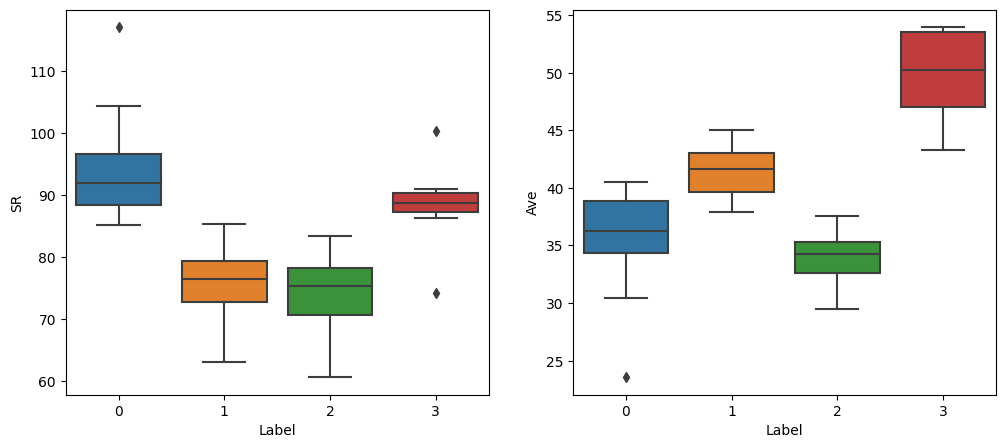

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.boxplot(data = df, y = 'SR', x = 'Label')

plt.subplot(1,2,2)
sns.boxplot(data = df, y = 'Ave', x = 'Label')
